# Data Load


In [3]:
import numpy as np
import math
import random
import os
import torch
import scipy.spatial.distance
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils

import plotly.graph_objects as go
import plotly.express as px

import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
# from google.colab import drive
import tensorflow as tf
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim


In [4]:
torch.cuda.empty_cache()

In [5]:
lxyz_train = pd.read_csv('./data/outputs/lxyz_train_xyzpocn.csv',index_col = False)
print(lxyz_train)

                x      y      z         p           o         c        n1  \
0        4.400000   5.60  11.00  0.889916  139.555687  0.034776  0.831919   
1        4.400000   5.65   9.80  0.862543  174.456555  0.040476 -0.937781   
2        4.400000   5.95   2.25  0.720397  376.340517  0.084192  0.758971   
3        4.400000   6.00   1.65  0.325332  283.398300  0.142658 -0.455799   
4        4.400000   5.80   2.90  0.760750  349.709760  0.078349  0.629671   
...           ...    ...    ...       ...         ...       ...       ...   
1241127  1.550000   6.95   7.25  0.265804  202.062927  0.112716  0.379005   
1241128  1.550000   7.00   7.60  0.432654  241.693884  0.088374 -0.496047   
1241129  1.550000   6.90   7.25  0.294161  214.719354  0.110785  0.317526   
1241130 -9.150001  11.45   7.10  0.322439   96.122849  0.084484 -0.711721   
1241131 -9.350000  11.30   5.30  0.403567  147.471003  0.076126  0.551258   

               n2        n3          l1          l2          l3  
0       -

In [6]:
lxyz_test = pd.read_csv('./data/outputs/lxyz_test_xyzpocn.csv',index_col = False)
print(lxyz_test)

            x          y          z         p          o         c        n1  \
0       14.25  12.950000   7.150000  0.117071   0.095071  0.023735  0.596763   
1       14.20  12.850000  19.150000  0.074767  17.740876  0.175874  0.938729   
2       14.20  12.800000  19.150000  0.080304  19.920146  0.159482  0.945373   
3       14.20  12.950000  19.200001  0.054315  12.568280  0.239675 -0.905330   
4       14.20  12.650001  19.600000  0.124446  25.038166  0.095084  0.944082   
...       ...        ...        ...       ...        ...       ...       ...   
627576 -13.80 -12.100000   1.600000  0.162190  40.424178  0.073496  0.882015   
627577 -13.80 -12.150001   1.600000  0.157458  46.817645  0.084224  0.860524   
627578 -13.80 -11.950000   1.550000  0.274379  15.954391  0.031064  0.954728   
627579 -13.85 -12.050000   1.600000  0.167637  29.673507  0.058562  0.896538   
627580 -13.85 -11.750000   1.600000  0.333941   5.438617  0.008600  0.999530   

              n2        n3          l1 

In [7]:
lclass_train = pd.read_csv("./data/outputs/lclass_train_xyzpocn.csv",index_col = False)
lclass_train = lclass_train.replace({14:1})
print(lclass_train.value_counts())

cla
0      504407
4      290500
1      190930
3      135591
5      105041
2       14663
dtype: int64


In [8]:
lclass_test = pd.read_csv("./data/outputs/lclass_test_xyzpocn.csv",index_col = False)
print(lclass_test.value_counts())

cla
0      229206
4      173727
1      152563
3       57049
5       12315
2        2721
dtype: int64


In [12]:
######################### using pandas for point reading ################
lxyz = pd.read_csv('./data/training/labelledLocalCRS/DEBY_LOD2_4959322/DEBY_LOD2_4959322.xyz', sep=" ", header=0)
lxyz.columns = ["x", "y", "z", "cla"]
print(lxyz.cla.value_counts())

lxyz_test = pd.read_csv('./data/test/labelledLocalCRS/DEBY_LOD2_4959459/DEBY_LOD2_4959459.xyz', sep=" ", header=0)
lxyz_test.columns = ["x", "y", "z", "cla"]
print(lxyz_test.cla.value_counts())

1     2869200
2      826645
5      746775
12     378061
16     366536
17     209118
3      111354
15      35457
11      22421
9        7342
13       1932
6        1319
14        731
Name: cla, dtype: int64
1     417280
2     276623
16    177257
5      93060
13     41630
17     24679
12     14055
3       4101
4       1072
9        682
Name: cla, dtype: int64


# Sample Points & Merge class

In [5]:
lclass = lxyz['cla'].replace({6:5,9:1,15:1,10:1,12:11,17:13,16:13,14:2})
print(lclass.value_counts())

lclass_test = lxyz_test['cla'].replace({6:5,9:1,15:1,10:1,12:11,17:13,16:13,14:2, 4:1})
print(lclass_test.value_counts())

1     2911999
2      827376
5      748094
13     577586
11     400482
3      111354
Name: cla, dtype: int64
1     419034
2     276623
13    243566
5      93060
11     14055
3       4101
Name: cla, dtype: int64


In [6]:
lclass = lclass.replace({5:4,13:5,11:6})
print(lclass.value_counts())
# 1: wall
# 2: window
# 3: door
# 4: molding
# 5: other
# 6: terrian

lclass_test = lclass_test.replace({5:4,13:5,11:6})
print(lclass_test.value_counts())

1    2911999
2     827376
4     748094
5     577586
6     400482
3     111354
Name: cla, dtype: int64
1    419034
2    276623
5    243566
4     93060
6     14055
3      4101
Name: cla, dtype: int64


In [7]:
lclass = lclass.replace({1:0,2:1,3:2,4:3,5:4,6:5})
print(lclass.value_counts())
# 0: wall
# 1: window
# 2: door
# 3: molding
# 4: other
# 5: terrian

lclass_test = lclass_test.replace({1:0,2:1,3:2,4:3,5:4,6:5})
print(lclass_test.value_counts())

0    2911999
1     827376
3     748094
4     577586
5     400482
2     111354
Name: cla, dtype: int64
0    419034
1    276623
4    243566
3     93060
5     14055
2      4101
Name: cla, dtype: int64


In [8]:
lxyz = lxyz.drop('cla',axis = 1) 
lxyz_test = lxyz_test.drop('cla',axis = 1) 

lxyz = lxyz.to_numpy().reshape(-1,3)
lxyz_test = lxyz_test.to_numpy().reshape(-1,3)

In [9]:
import open3d as o3d

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [10]:
######################### using open3d for point processing ################
device = o3d.core.Device("CPU:0")
dtype = o3d.core.float32
pcd = o3d.t.geometry.PointCloud(device)
pcd.point.positions = o3d.core.Tensor(lxyz, dtype, device)
pcd.point.labels = o3d.core.Tensor(lclass.to_numpy().reshape(-1,1), o3d.core.int32, device)
# o3d.visualization.draw([pcd])
downpcd = pcd.voxel_down_sample(voxel_size = 0.05)

lxyz_train = downpcd.point.positions.numpy()
lclass_train = downpcd.point.labels.numpy()

pcd_train = o3d.geometry.PointCloud()
pcd_train.points = o3d.utility.Vector3dVector(lxyz_train)

# 颜色
colors = plt.get_cmap("tab20")(np.array(lclass_train).reshape(-1) / 17.0)
colors = colors[:,0:3]
pcd_train.colors=o3d.utility.Vector3dVector(colors)
o3d.visualization.draw_geometries([pcd_train], window_name='test the color',width=800,height=600)

In [11]:
pcd_test = o3d.t.geometry.PointCloud(device)
pcd_test.point.positions = o3d.core.Tensor(lxyz_test, dtype, device)
pcd_test.point.labels = o3d.core.Tensor(lclass_test.to_numpy().reshape(-1,1), o3d.core.int32, device)
# o3d.visualization.draw([pcd])
downpcd_test = pcd_test.voxel_down_sample(voxel_size = 0.05)

lxyz_test = downpcd_test.point.positions.numpy()
lclass_test = downpcd_test.point.labels.numpy()

pcd_test = o3d.geometry.PointCloud()
pcd_test.points = o3d.utility.Vector3dVector(lxyz_test)

# 颜色
colors = plt.get_cmap("tab20")(np.array(lclass_test).reshape(-1) / 17.0)
colors = colors[:,0:3]
pcd_test.colors=o3d.utility.Vector3dVector(colors)
o3d.visualization.draw_geometries([pcd_test], window_name='test the color',width=800,height=600)

# Add Features

In [12]:
def PCA(data, correlation=False, sort=True):
    average_data = np.mean(data,axis=0)       # calulating the centroid
    decentration_matrix = data - average_data   # move the origin to the centroid
    H = np.dot(decentration_matrix.T,decentration_matrix)  # calculating decentration_matrix H
    eigenvectors,eigenvalues,eigenvectors_T = np.linalg.svd(H)    # SVD - eigenvalue,eigenvector


    if sort:
        sort = eigenvalues.argsort()[::-1]      # sorting as main component
        eigenvalues = eigenvalues[sort]         
        eigenvectors = eigenvectors[:, sort]

    return eigenvalues, eigenvectors

def collFeatures(pcd,length,size = 0.8):
    pcd_tree = o3d.geometry.KDTreeFlann(pcd)  #set a kd tree for tha point cloud, make searching faster
    normals = []
    llambda = []
    lp = []
    lo = []
    lc = []
    non_idx = []
    # print(point_cloud_o3d)  #geometry::PointCloud with 10000 points.
    print(length) #10000
    for i in range(length):
        # search_knn_vector_3d， input[point，x]      returns [int, open3d.utility.IntVector, open3d.utility.DoubleVector]
        [_, idx, _] = pcd_tree.search_radius_vector_3d(pcd.points[i], size)  
        # asarray is the same as array  but asarray will save the memeory
        k_nearest_point = np.asarray(pcd.points)[idx, :]  #find the surrounding points for each point, set them as a curve and use PCA to find the normal
        lamb, v = PCA(k_nearest_point)
        if len(k_nearest_point) == 1:
            non_idx.append(i)  # record the index that has no knn point
            p = 0
            o = 0
            c = 0
        else:
            p = (lamb[1]-lamb[2])/lamb[0] # calculate features based on eigenvalues
            o = pow(lamb[0]*lamb[1]*lamb[2],1.0/3.0)
            c = lamb[2]/sum(lamb)
        normals.append(v[:, 1])
        llambda.append(lamb)
        lp.append(p)
        lo.append(o)
        lc.append(c)
    return np.array(normals),np.array(llambda),np.array(lp).reshape(length,-1),np.array(lo).reshape(length,-1),np.array(lc).reshape(length,-1), np.array(non_idx)

In [13]:
# add features, normals, lambda, p, o, c, radius is 0.8m
normals,llambda,lp,lo,lc,non_index = collFeatures(pcd_train,downpcd.point.positions.shape[0])
lxyz_train = np.hstack((lxyz_train,lp,lo,lc))
lxyz_train = pd.DataFrame(lxyz_train)
lxyz_train.columns = ["x", "y", "z", "p","o","c"]
lxyz_train = lxyz_train.drop(lxyz_train.index[non_index])
lclass_train = np.delete(lclass_train, non_index, axis=0)

1241136


In [14]:
normals_t,llambda_t,lp_t,lo_t,lc_t,non_index_t = collFeatures(pcd_test,downpcd_test.point.positions.shape[0])
lxyz_test = np.hstack((lxyz_test,lp_t,lo_t,lc_t))
lxyz_test = pd.DataFrame(lxyz_test)
lxyz_test.columns = ["x", "y", "z", "p","o","c"]
lxyz_test = lxyz_test.drop(lxyz_test.index[non_index_t])
lclass_test = np.delete(lclass_test, non_index_t, axis=0)

627590


In [ ]:
lxyz_train = lxyz_train.reset_index()
lxyz_test = lxyz_test.reset_index()

In [9]:
lxyz_train = lxyz_train.drop('index',axis = 1)
lxyz_test = lxyz_test.drop('index',axis = 1)

KeyError: "['index'] not found in axis"

In [10]:
lxyz_train = lxyz_train.drop(['o','n1','n3'],axis = 1)
lxyz_test = lxyz_test.drop(['o','n1','n3'],axis = 1)

In [11]:
lclass_train = pd.DataFrame(lclass_train, columns = ['cla'], dtype = int)
lclass_test = pd.DataFrame(lclass_test, columns = ['cla'], dtype = int)

In [12]:
print(lclass_test.value_counts())

cla
0      229206
4      173727
1      152563
3       57049
5       12315
2        2721
dtype: int64


In [13]:
print(lclass_train)

         cla
0          0
1          0
2          0
3          0
4          0
...      ...
1241127    4
1241128    4
1241129    4
1241130    4
1241131    4

[1241132 rows x 1 columns]


In [14]:
print(lclass_test)

        cla
0         4
1         4
2         4
3         4
4         4
...     ...
627576    4
627577    4
627578    4
627579    4
627580    4

[627581 rows x 1 columns]


In [15]:
print(lxyz_train)

                x      y      z         p         c        n2          l1  \
0        4.400000   5.60  11.00  0.889916  0.034776 -0.266723  342.159866   
1        4.400000   5.65   9.80  0.862543  0.040476  0.312998  409.218574   
2        4.400000   5.95   2.25  0.720397  0.084192 -0.639324  699.386299   
3        4.400000   6.00   1.65  0.325332  0.142658 -0.637798  526.388947   
4        4.400000   5.80   2.90  0.760750  0.078349 -0.641620  656.421599   
...           ...    ...    ...       ...       ...       ...         ...   
1241127  1.550000   6.95   7.25  0.265804  0.112716 -0.724285  463.428975   
1241128  1.550000   7.00   7.60  0.432654  0.088374  0.413231  538.944969   
1241129  1.550000   6.90   7.25  0.294161  0.110785 -0.764079  482.548745   
1241130 -9.150001  11.45   7.10  0.322439  0.084484  0.505537  243.620677   
1241131 -9.350000  11.30   5.30  0.403567  0.076126 -0.833320  363.542946   

                 l2          l3  
0        328.662887   24.169234  
1      

In [16]:
print(lxyz_test)

            x          y          z         p         c        n2          l1  \
0       14.25  12.950000   7.150000  0.117071  0.023735 -0.053219    0.597247   
1       14.20  12.850000  19.150000  0.074767  0.175874 -0.336146   37.389544   
2       14.20  12.800000  19.150000  0.080304  0.159482 -0.321293   45.428023   
3       14.20  12.950000  19.200001  0.054315  0.239675  0.410512   19.643622   
4       14.20  12.650001  19.600000  0.124446  0.095084 -0.325949   77.393937   
...       ...        ...        ...       ...       ...       ...         ...   
627576 -13.80 -12.100000   1.600000  0.162190  0.073496 -0.452860  135.986943   
627577 -13.80 -12.150001   1.600000  0.157458  0.084224 -0.484578  147.155325   
627578 -13.80 -11.950000   1.550000  0.274379  0.031064 -0.297292   67.232417   
627579 -13.85 -12.050000   1.600000  0.167637  0.058562 -0.437825  111.238593   
627580 -13.85 -11.750000   1.600000  0.333941  0.008600 -0.000719   34.163937   

               l2         l

In [17]:
train_temp = lxyz_train
test_temp = lxyz_test

# Data Spilt

In [18]:
lxyz_train = pd.concat([lxyz_train, lclass_train], axis = 1)
lxyz_test = pd.concat([lxyz_test, lclass_test], axis = 1)
# print(lxyz_test.cla.value_counts())

In [19]:
print(lxyz_train)
print(lxyz_test)

                x      y      z         p         c        n2          l1  \
0        4.400000   5.60  11.00  0.889916  0.034776 -0.266723  342.159866   
1        4.400000   5.65   9.80  0.862543  0.040476  0.312998  409.218574   
2        4.400000   5.95   2.25  0.720397  0.084192 -0.639324  699.386299   
3        4.400000   6.00   1.65  0.325332  0.142658 -0.637798  526.388947   
4        4.400000   5.80   2.90  0.760750  0.078349 -0.641620  656.421599   
...           ...    ...    ...       ...       ...       ...         ...   
1241127  1.550000   6.95   7.25  0.265804  0.112716 -0.724285  463.428975   
1241128  1.550000   7.00   7.60  0.432654  0.088374  0.413231  538.944969   
1241129  1.550000   6.90   7.25  0.294161  0.110785 -0.764079  482.548745   
1241130 -9.150001  11.45   7.10  0.322439  0.084484  0.505537  243.620677   
1241131 -9.350000  11.30   5.30  0.403567  0.076126 -0.833320  363.542946   

                 l2          l3  cla  
0        328.662887   24.169234    0

In [20]:
def spilt_data(lxyz):
  class_uniques = lxyz['cla'].unique() #把一列所有取值提出来成为一个Array 
  re = []
  for column in class_uniques:
    temp_data = lxyz[lxyz['cla'].isin([column])] #按照列的某个值取一个dataframe
    batch_num = int(len(temp_data)/1024)
    print(batch_num)
    temp_data = temp_data[0:batch_num*1024]
    re.append(temp_data)
  re = pd.concat(re)
  return re

lxyz_train = spilt_data(lxyz_train)
print(lxyz_train.cla.value_counts())
print('---------')
lxyz_test = spilt_data(lxyz_test)

492
132
102
283
186
14
0    503808
4    289792
1    190464
3    135168
5    104448
2     14336
Name: cla, dtype: int64
---------
169
148
223
55
2
12


In [21]:
print(lxyz_train)
print(lxyz_test)

            x     y      z         p         c        n2          l1  \
0         4.4  5.60  11.00  0.889916  0.034776 -0.266723  342.159866   
1         4.4  5.65   9.80  0.862543  0.040476  0.312998  409.218574   
2         4.4  5.95   2.25  0.720397  0.084192 -0.639324  699.386299   
3         4.4  6.00   1.65  0.325332  0.142658 -0.637798  526.388947   
4         4.4  5.80   2.90  0.760750  0.078349 -0.641620  656.421599   
...       ...   ...    ...       ...       ...       ...         ...   
1151087  11.5  2.45   4.55  0.798601  0.068831 -0.215826  596.338666   
1151088  11.5  2.40   5.20  0.678733  0.079641 -0.311444  547.080619   
1151089  11.5  2.40   5.00  0.785096  0.071152 -0.283920  551.845218   
1151090  11.5  2.55   4.30  0.752454  0.066457 -0.021658  673.109075   
1151091  11.5  2.35   4.05  0.756954  0.076652  0.780843  512.283560   

                 l2          l3  cla  
0        328.662887   24.169234    0  
1        386.535977   33.567316    0  
2        625.64892

# Dataset Preparation


In [24]:
class ToTensor(object):
    def __call__(self, pointcloud):
        assert len(pointcloud.shape)==2
        pointcloud = pointcloud.to_numpy()
        return torch.from_numpy(pointcloud)

In [23]:
class Normalize(object):
    def __call__(self, pointcloud):
        assert len(pointcloud.shape)==2
        
        pointcloud = pointcloud.to_numpy()
        
        norm_pointcloud = pointcloud - np.mean(pointcloud, axis=0) 
        norm_pointcloud /= np.max(np.linalg.norm(norm_pointcloud, axis=1))
        norm_pointcloud[:,6] = pointcloud[:,6]

        return  norm_pointcloud

In [25]:
def default_transforms():
    return transforms.Compose([
#                                Normalize(),
                                ToTensor()
                              ])

In [26]:
train_transforms = default_transforms()
batch_num_test = int(len(lxyz_test)/1024)
batch_num_train = int(len(lxyz_train)/1024)
_train = lxyz_train[0:(1024*batch_num_train)]
_test = lxyz_test[0:(1024*batch_num_test)]
print(len(_train))
print(len(_test))
print(batch_num_test)
print(batch_num_train)

data_test_temp = np.split(_test,batch_num_test)
data_train_temp = np.split(_train,batch_num_train)

data_test = [ train_transforms(test) for test in data_test_temp]
data_train = [ train_transforms(train) for train in data_train_temp]

print(len(data_test))
print('type of : ', data_test[2].size())
print(data_test[2])

1238016
623616
609
1209
609
type of :  torch.Size([1024, 10])
tensor([[1.2000e+01, 1.5350e+01, 1.9900e+01,  ..., 1.0401e+00, 4.8924e-01,
         4.0000e+00],
        [1.2000e+01, 1.3100e+01, 9.1500e+00,  ..., 2.7729e+00, 6.1714e-02,
         4.0000e+00],
        [1.2000e+01, 1.4950e+01, 1.2550e+01,  ..., 3.3502e+01, 6.5416e+00,
         4.0000e+00],
        ...,
        [1.1450e+01, 1.3950e+01, 1.6450e+01,  ..., 1.5466e+02, 8.1289e+01,
         4.0000e+00],
        [1.1450e+01, 1.3950e+01, 1.6800e+01,  ..., 1.5215e+02, 7.8337e+01,
         4.0000e+00],
        [1.1450e+01, 1.3750e+01, 1.6250e+01,  ..., 1.3917e+02, 1.0502e+02,
         4.0000e+00]], dtype=torch.float64)


In [27]:
len_total = len(data_train)
print(len_total)
train_size = int(len_total*0.75)
test_size = len_total - train_size
print(train_size)
print(test_size)

1209
906
303


In [28]:
data_train, data_valid = torch.utils.data.random_split(data_train, [train_size, test_size])
print(len(data_valid))
print('type of : ', data_valid[2].size())
print(data_valid[2])

303
type of :  torch.Size([1024, 10])
tensor([[-15.0500,  -1.3500,  15.9000,  ..., 124.3562,  88.3962,   0.0000],
        [-15.0500,  -1.7500,  14.8000,  ..., 205.5914,   8.6074,   0.0000],
        [-15.0500,  -1.8500,  19.6500,  ..., 208.9167,   8.4609,   0.0000],
        ...,
        [-15.2000,  -1.7000,  15.8000,  ..., 167.2303,  42.5687,   0.0000],
        [-15.2000,  -1.8000,  19.6000,  ..., 211.6272,   7.8379,   0.0000],
        [-15.2000,  -1.5000,  16.7000,  ..., 187.6553,  76.4860,   0.0000]],
       dtype=torch.float64)


In [29]:
train_loader = DataLoader(dataset=data_train, batch_size=32, shuffle=True)
valid_loader = DataLoader(dataset=data_valid, batch_size=32)
test_loader = DataLoader(dataset=data_test, batch_size = 32)

# Model Description

In [38]:
import torch
import torch.nn as nn
import numpy as np
import torch.nn.functional as F

class Tnet(nn.Module):
   def __init__(self, k=6):
      super().__init__()
      self.k=k
      self.conv1 = nn.Conv1d(k,64,1)
      self.conv2 = nn.Conv1d(64,128,1)
      self.conv3 = nn.Conv1d(128,1024,1)
      self.fc1 = nn.Linear(1024,512)
      self.fc2 = nn.Linear(512,256)
      self.fc3 = nn.Linear(256,k*k)

      self.bn1 = nn.BatchNorm1d(64)
      self.bn2 = nn.BatchNorm1d(128)
      self.bn3 = nn.BatchNorm1d(1024)
      self.bn4 = nn.BatchNorm1d(512)
      self.bn5 = nn.BatchNorm1d(256)
       

   def forward(self, input):
      # input.shape == (bs,n,3)
      bs = input.size(0)
      xb = F.relu(self.bn1(self.conv1(input)))
      xb = F.relu(self.bn2(self.conv2(xb)))
      xb = F.relu(self.bn3(self.conv3(xb)))
      pool = nn.MaxPool1d(xb.size(-1))(xb)
      flat = nn.Flatten(1)(pool)
      xb = F.relu(self.bn4(self.fc1(flat)))
      xb = F.relu(self.bn5(self.fc2(xb)))
      
      #initialize as identity
      init = torch.eye(self.k, requires_grad=True).repeat(bs,1,1)
      if xb.is_cuda:
        init=init.cuda()
      matrix = self.fc3(xb).view(-1,self.k,self.k) + init
      return matrix


class Transform(nn.Module):
   def __init__(self):
        super().__init__()
        self.input_transform = Tnet(k=9)
        self.feature_transform = Tnet(k=64)
        self.conv1 = nn.Conv1d(9,64,1)

        self.conv2 = nn.Conv1d(64,128,1)
        self.conv3 = nn.Conv1d(128,1024,1)
       

        self.bn1 = nn.BatchNorm1d(64)
        self.bn2 = nn.BatchNorm1d(128)
        self.bn3 = nn.BatchNorm1d(1024)
       
   def forward(self, input):
        matrix3x3 = self.input_transform(input)
        # batch matrix multiplication
        xb = torch.bmm(torch.transpose(input,1,2), matrix3x3).transpose(1,2)

        xb = F.relu(self.bn1(self.conv1(xb)))

        matrix64x64 = self.feature_transform(xb)
        xb = torch.bmm(torch.transpose(xb,1,2), matrix64x64).transpose(1,2)

        xb = F.relu(self.bn2(self.conv2(xb)))
        xb = self.bn3(self.conv3(xb))
        xb = nn.MaxPool1d(xb.size(-1))(xb)
        output = nn.Flatten(1)(xb)
        return output, matrix3x3, matrix64x64

class PointNet(nn.Module):
    def __init__(self, classes = 6):
        super().__init__()
        self.transform = Transform()
        self.fc1 = nn.Linear(1024, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, classes)
        

        self.bn1 = nn.BatchNorm1d(512)
        self.bn2 = nn.BatchNorm1d(256)
        self.dropout = nn.Dropout(p=0.3)
        self.logsoftmax = nn.LogSoftmax(dim=1)

    def forward(self, input):
        xb, matrix3x3, matrix64x64 = self.transform(input)
        xb = F.relu(self.bn1(self.fc1(xb)))
        xb = F.relu(self.bn2(self.dropout(self.fc2(xb))))
        output = self.fc3(xb)
        return self.logsoftmax(output), matrix3x3, matrix64x64

In [40]:
def pointnetloss(outputs, labels, m3x3, m64x64, alpha = 0.0001):
    criterion = torch.nn.NLLLoss()
    bs=outputs.size(0)
    id3x3 = torch.eye(9, requires_grad=True).repeat(bs,1,1)
    id64x64 = torch.eye(64, requires_grad=True).repeat(bs,1,1)
    if outputs.is_cuda:
        id3x3=id3x3.cuda()
        id64x64=id64x64.cuda()
    diff3x3 = id3x3-torch.bmm(m3x3,m3x3.transpose(1,2))
    diff64x64 = id64x64-torch.bmm(m64x64,m64x64.transpose(1,2))
    return criterion(outputs, labels) + alpha * (torch.norm(diff3x3)+torch.norm(diff64x64)) / float(bs)

In [41]:
CUDA_LAUNCH_BLOCKING="1"

# Training


In [42]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [82]:
device = torch.device('cpu')
print(device)

cpu


In [47]:
pointnet = PointNet()
pointnet.to(device);

In [48]:
optimizer = torch.optim.Adam(pointnet.parameters(), lr=0.001)

In [50]:
def train(model, train_loader, val_loader=None,  epochs=10, save=True):
    for epoch in range(epochs): 
        pointnet.train()
        running_loss = 0.0
        for i, data in enumerate(train_loader, 0):
            labels = data[:,1,9]
            labels = labels.type(torch.LongTensor) 
            inputs, labels = data[:,:,0:9].to(device).float(), labels.to(device)
            optimizer.zero_grad()
            outputs, m3x3, m64x64 = pointnet(inputs.transpose(1,2))

            loss = pointnetloss(outputs, labels, m3x3, m64x64)
            loss.backward()
            optimizer.step()

            # print statistics
            running_loss += loss.item()
            if i % 10 == 9:    # print every 10 mini-batches
                    print('[Epoch: %d, Batch: %4d / %4d], loss: %.3f' %
                        (epoch + 1, i + 1, len(train_loader), running_loss / 10))
                    running_loss = 0.0

        pointnet.eval()
        correct = total = 0

        # validation
        if val_loader:
            with torch.no_grad():
                for data in val_loader:
                    labels = data[:,1,9]
                    labels = labels.type(torch.LongTensor) 
                    inputs, labels = data[:,:,0:9].to(device).float(), labels.to(device)
                    outputs, __, __ = pointnet(inputs.transpose(1,2))
                    _, predicted = torch.max(outputs.data, 1)
                    total += labels.size(0)
                    correct += (predicted == labels).sum().item()
            val_acc = 100. * correct / total
            print('Valid accuracy: %d %%' % val_acc)

        # save the model
        if save:
            torch.save(pointnet.state_dict(), "save_"+str(epoch)+".pth")

In [51]:
train(pointnet, train_loader, valid_loader,  save=False)

[Epoch: 1, Batch:   10 /   29], loss: 1.275
[Epoch: 1, Batch:   20 /   29], loss: 0.690
Valid accuracy: 48 %
[Epoch: 2, Batch:   10 /   29], loss: 0.655
[Epoch: 2, Batch:   20 /   29], loss: 0.559
Valid accuracy: 83 %
[Epoch: 3, Batch:   10 /   29], loss: 0.426
[Epoch: 3, Batch:   20 /   29], loss: 0.430
Valid accuracy: 85 %
[Epoch: 4, Batch:   10 /   29], loss: 0.397
[Epoch: 4, Batch:   20 /   29], loss: 0.326
Valid accuracy: 93 %
[Epoch: 5, Batch:   10 /   29], loss: 0.307
[Epoch: 5, Batch:   20 /   29], loss: 0.386
Valid accuracy: 82 %
[Epoch: 6, Batch:   10 /   29], loss: 0.292
[Epoch: 6, Batch:   20 /   29], loss: 0.272
Valid accuracy: 93 %
[Epoch: 7, Batch:   10 /   29], loss: 0.303
[Epoch: 7, Batch:   20 /   29], loss: 0.184
Valid accuracy: 91 %
[Epoch: 8, Batch:   10 /   29], loss: 0.176
[Epoch: 8, Batch:   20 /   29], loss: 0.177
Valid accuracy: 97 %
[Epoch: 9, Batch:   10 /   29], loss: 0.174
[Epoch: 9, Batch:   20 /   29], loss: 0.217
Valid accuracy: 93 %
[Epoch: 10, Batch: 

In [52]:
torch.save(pointnet.state_dict(), "best_model_p_xyzgf_sd.pth")

# Test

In [53]:
from sklearn.metrics import confusion_matrix

In [54]:
pointnet = PointNet()
pointnet.load_state_dict(torch.load('best_model_p_xyzgf_sd.pth'))
pointnet.eval();

In [55]:
all_preds = []
all_labels = []
with torch.no_grad():
    for i, data in enumerate(test_loader):
        print('Batch [%4d / %4d]' % (i+1, len(test_loader)))
                   
        labels = data[:,1,9]
        labels = labels.type(torch.LongTensor) 
        inputs, labels = data[:,:,0:9].float(), labels
        outputs, __, __ = pointnet(inputs.transpose(1,2))
        _, preds = torch.max(outputs.data, 1)
        all_preds += list(preds.numpy())
        all_labels += list(labels.numpy())
        


Batch [   1 /   20]
Batch [   2 /   20]
Batch [   3 /   20]
Batch [   4 /   20]
Batch [   5 /   20]
Batch [   6 /   20]
Batch [   7 /   20]
Batch [   8 /   20]
Batch [   9 /   20]
Batch [  10 /   20]
Batch [  11 /   20]
Batch [  12 /   20]
Batch [  13 /   20]
Batch [  14 /   20]
Batch [  15 /   20]
Batch [  16 /   20]
Batch [  17 /   20]
Batch [  18 /   20]
Batch [  19 /   20]
Batch [  20 /   20]


In [56]:
cm = confusion_matrix(all_labels, all_preds);
cm
print(np.bincount(all_labels))
print(np.bincount(all_preds))
print(cm)

correct_rate = np.diagonal(cm).sum()/cm.sum()
print(correct_rate)

[223 148   2  55 169  12]
[182  55   7  14 347   4]
[[126   8   1   4  84   0]
 [ 33  24   6   0  82   3]
 [  0   0   0   0   1   1]
 [ 11  23   0  10  11   0]
 [ 12   0   0   0 157   0]
 [  0   0   0   0  12   0]]
0.5205254515599343


In [57]:
classes = {'wall & balcony & ..': 0,
           'window & blinds': 1,
           'door': 2,
           'molding & decoration': 3,
           'ground surface & terrian': 4,
           'roof & others': 5}
classes
cla_test = {'wall & balcony & ..': 0,
            'window & blinds': 1,
            'door': 2,
            'molding & decoration': 3,
            'ground surface & terrian': 4,
            'roof & others': 5}
cla_test

{'wall & balcony & ..': 0,
 'window & blinds': 1,
 'door': 2,
 'molding & decoration': 3,
 'ground surface & terrian': 4,
 'roof & others': 5}

In [58]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

# function from https://deeplizard.com/learn/video/0LhiS6yu2qQ
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Normalized confusion matrix


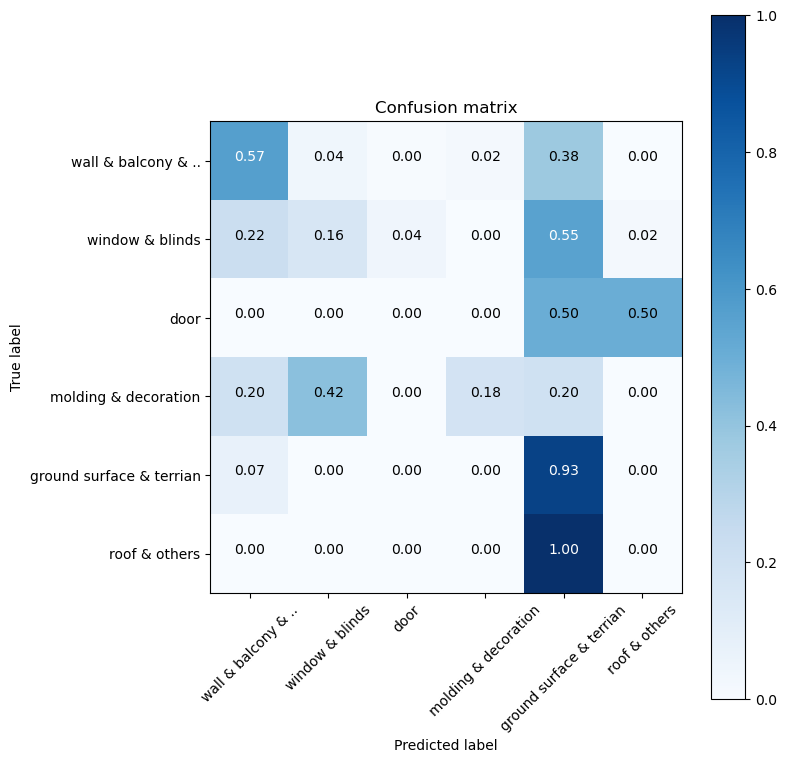

In [59]:
plt.figure(figsize=(8,8))
plot_confusion_matrix(cm, list(cla_test.keys()), normalize=True)

Confusion matrix, without normalization


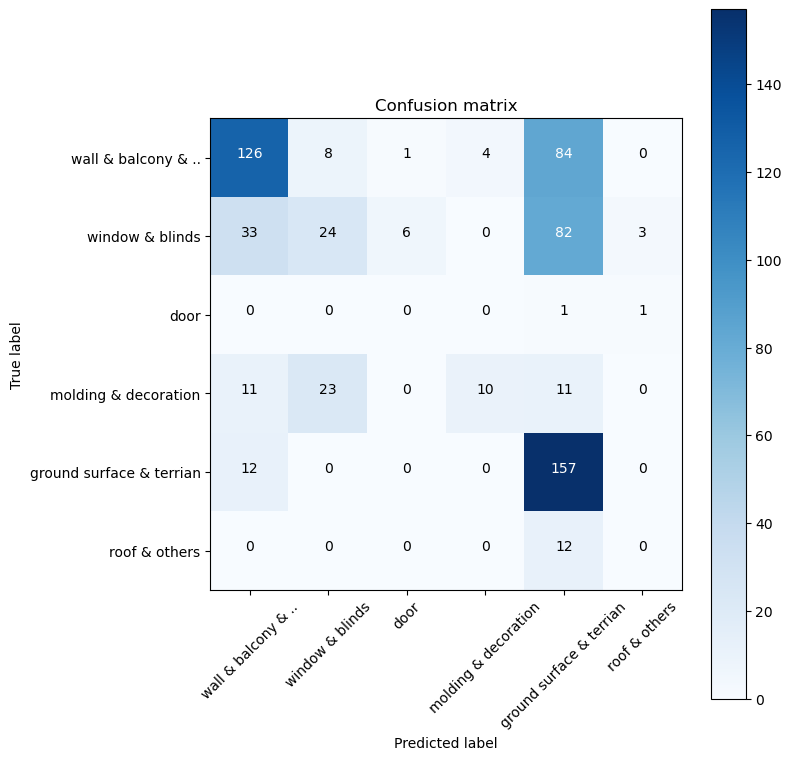

In [60]:
plt.figure(figsize=(8,8))
plot_confusion_matrix(cm, list(cla_test.keys()), normalize=False)